Init Model

#### Imports
---

In [2]:
# imports for the practice (you can add more if you need)
import os
from tqdm import tqdm
import torchviz
import numpy as np
import pandas as pd
import torch
import time
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
# %matplotlib notebook
%matplotlib inline

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f'torch.cuda.is_available(): {cuda_available}') 

# Check cuda version
print(torch.version.cuda)  


seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

torch.cuda.is_available(): True
12.1


#### Load The Data
---

Training set size: 4480
Validation set size: 960
Test set size: 960


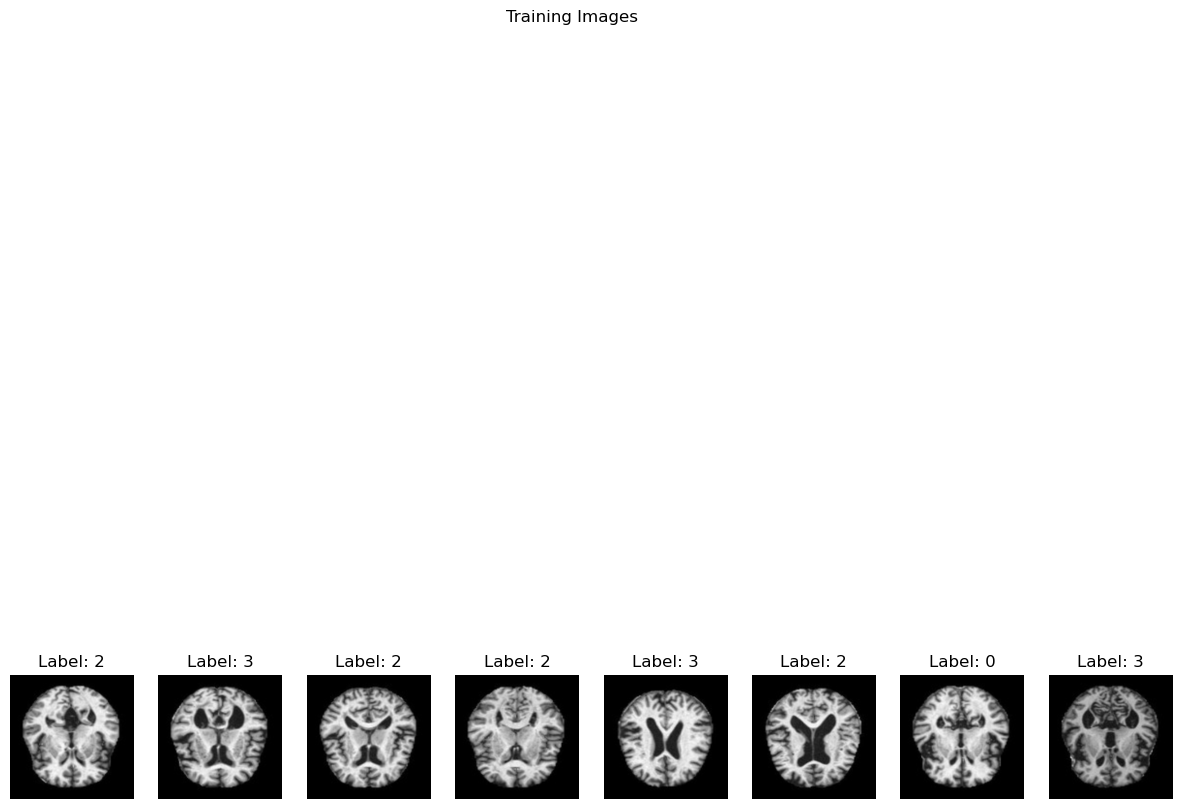

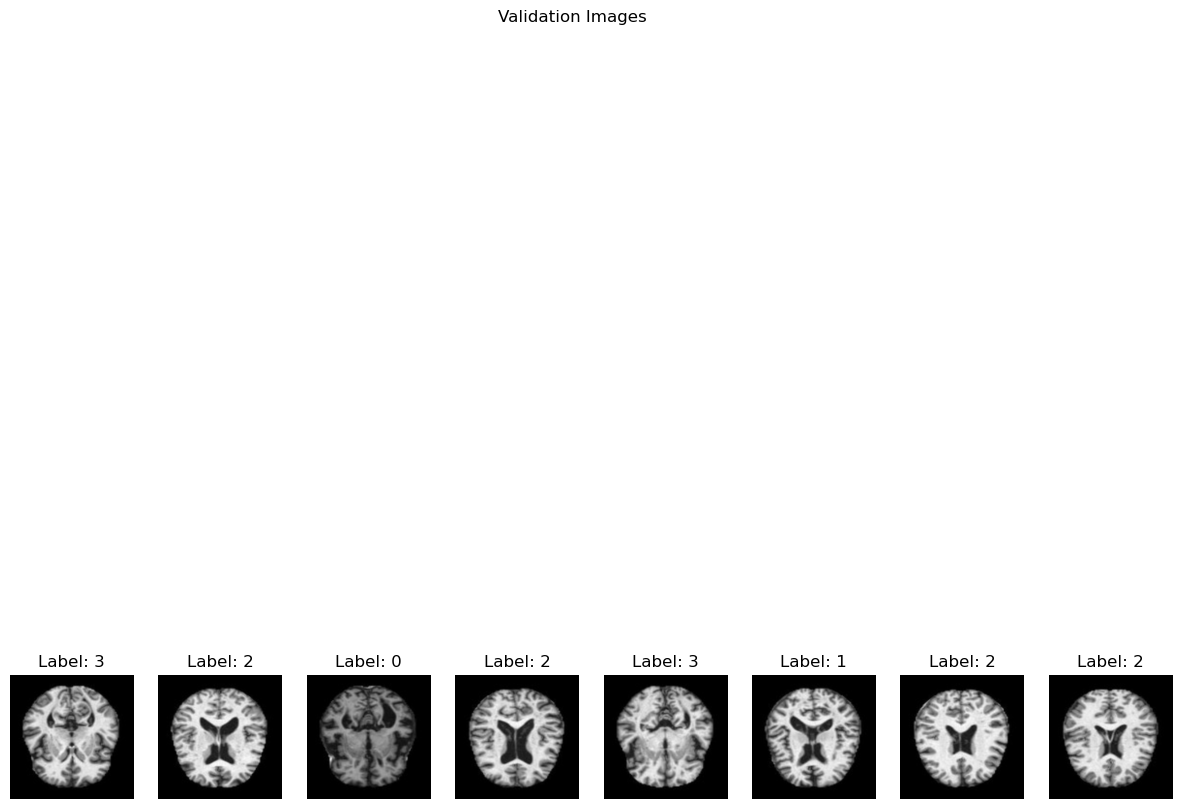

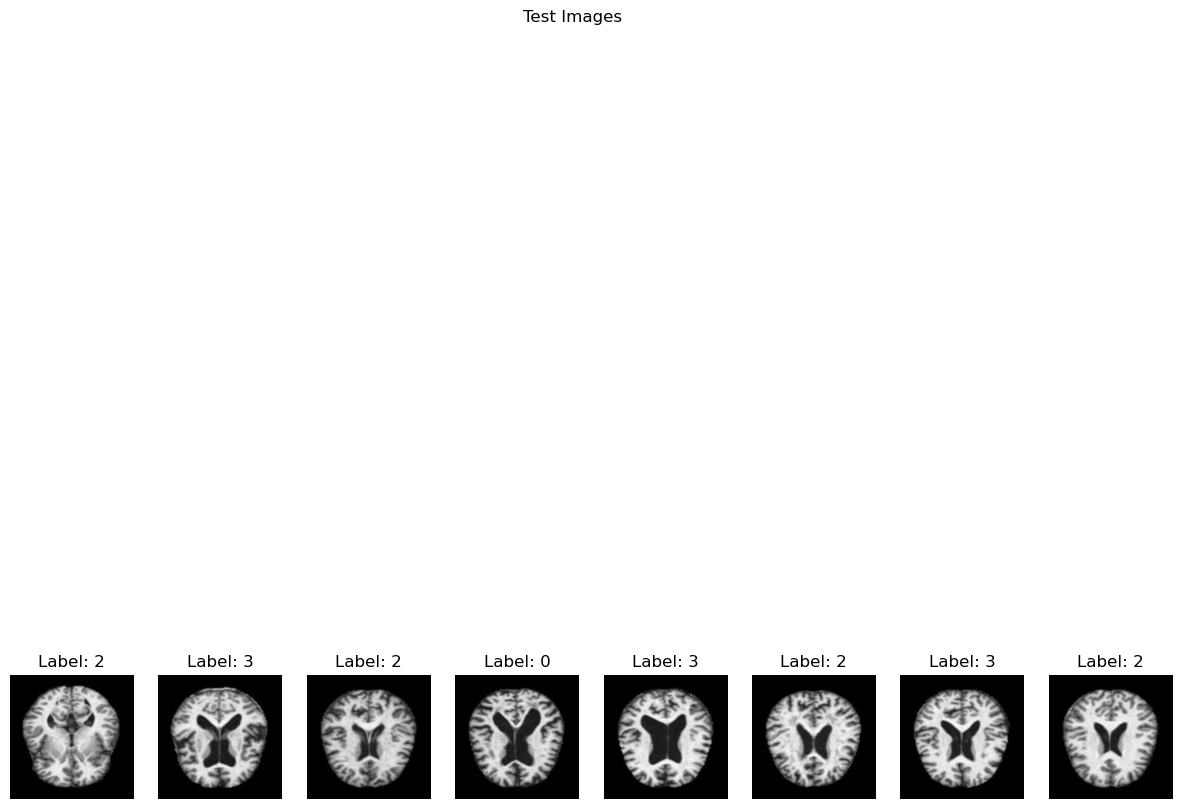

In [3]:
# Define the directory containing the dataset
data_dir = '../dataset'


transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224 pixels
    transforms.ToTensor(),  # Convert images to tensors
])

# Load the dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Shuffle and split the dataset
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size  # 15% for testing

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


# Print the sizes of each dataset
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(val_dataset)}')
print(f'Test set size: {len(test_dataset)}')

# Function to show a batch of images
def show_images(loader, title):
    # Get a batch of images and labels
    images, labels = next(iter(loader))
    
    # Create a grid of images
    grid_size = min(len(images), 8)
    fig, axes = plt.subplots(1, grid_size, figsize=(15, 15))
    for i in range(grid_size):
        image = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Label: {labels[i].item()}')
    plt.suptitle(title)
    plt.show()

# Show images from each group
show_images(train_loader, 'Training Images')
show_images(val_loader, 'Validation Images')
show_images(test_loader, 'Test Images')

#### Seperate the train , validation and test
---

In [4]:
# # separate to train, test
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.125, random_state = 5)